# Predicting trips duration - mlopszoomcamp - homework 1
 **By Selorm Komla Darkey**

In [1]:
import pandas as pd
# !pip install pyarrow
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error

## EDA


In [2]:
df_jan = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet")

In [3]:
df_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [4]:
print(f"Number of columns in January 2023 yellow taxi dataset is {len(df_jan.columns)}")

Number of columns in January 2023 yellow taxi dataset is 19


In [5]:
# df_feb = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet")

In [6]:
# df_feb.head()

In [7]:
# print(f"Number of columns in February 2023 yellow taxi dataset is {len(df_feb.columns)}")

## Calculating the duration variable
**Duration:** Difference between trip pickup time and dropoff time

In [8]:
# inspecting the data types of the columns
df_jan.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [9]:
df_jan["duration"] = df_jan["tpep_dropoff_datetime"] - df_jan["tpep_pickup_datetime"]

In [10]:
df_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,0 days 00:08:26
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,0 days 00:06:19
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,0 days 00:12:45
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,0 days 00:09:37
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,0 days 00:10:50


In [11]:
### converting the datetime to seconds
df_jan['duration'] = df_jan["duration"].apply(lambda td: td.total_seconds()/60)

In [12]:
df_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333


In [13]:
import numpy as np
df_jan.duration.std()

42.594351241920904

## Checking the distribution in the trips duration

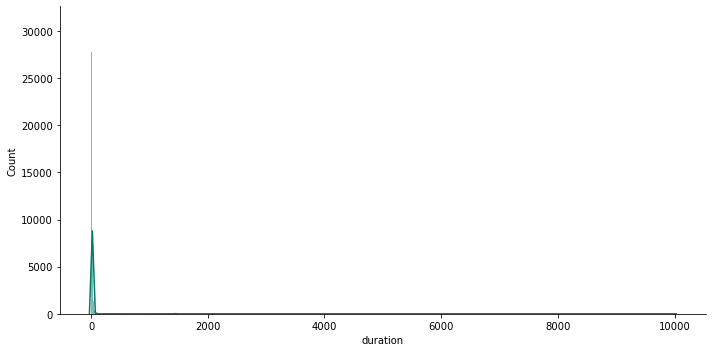

In [14]:
sns.displot(df_jan.duration,
            aspect=2,
            kde=True,
            color='#00796b')

In [15]:
df_jan["duration"].describe()

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64

In [16]:
len(df_jan)

3066766

### dropping trip duration below 1 minute or above 60 mins 

In [17]:
df = df_jan[(df_jan["duration"] >= 1) & (df_jan["duration"] <= 60)]

In [18]:
print(f"the amount of records left for trips btn 1 and 60 mins duration is {len(df)}")

the amount of records left for trips btn 1 and 60 mins duration is 3009173


### calculating the fraction of data left


In [19]:
# calculating the fraction of data left

print(f"fraction of data left is {len(df)/len(df_jan) * 100}")

fraction of data left is 98.1220282212598


### One hot encoding

In [20]:
# getting the categorical variables
categorical = ["PULocationID", "DOLocationID"]

In [21]:
# getting the datatypes of categorical variables
df[categorical].dtypes

# recasting to string data type
df[categorical].astype(str).dtypes

PULocationID    object
DOLocationID    object
dtype: object

In [22]:
# getting them back in main df
df[categorical] = df[categorical].astype(str)

/tmp/ipykernel_11777/121040481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = df[categorical].astype(str)


In [23]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

### getting the feature matrix

In [24]:
# turning the dataframe to dictionary
train_dict = df[categorical].to_dict(orient='records')

In [25]:
train_dict

[{'PULocationID': '161', 'DOLocationID': '141'},
 {'PULocationID': '43', 'DOLocationID': '237'},
 {'PULocationID': '48', 'DOLocationID': '238'},
 {'PULocationID': '138', 'DOLocationID': '7'},
 {'PULocationID': '107', 'DOLocationID': '79'},
 {'PULocationID': '161', 'DOLocationID': '137'},
 {'PULocationID': '239', 'DOLocationID': '143'},
 {'PULocationID': '142', 'DOLocationID': '200'},
 {'PULocationID': '164', 'DOLocationID': '236'},
 {'PULocationID': '141', 'DOLocationID': '107'},
 {'PULocationID': '234', 'DOLocationID': '68'},
 {'PULocationID': '79', 'DOLocationID': '264'},
 {'PULocationID': '164', 'DOLocationID': '143'},
 {'PULocationID': '138', 'DOLocationID': '33'},
 {'PULocationID': '33', 'DOLocationID': '61'},
 {'PULocationID': '79', 'DOLocationID': '186'},
 {'PULocationID': '90', 'DOLocationID': '48'},
 {'PULocationID': '113', 'DOLocationID': '255'},
 {'PULocationID': '237', 'DOLocationID': '239'},
 {'PULocationID': '143', 'DOLocationID': '229'},
 {'PULocationID': '137', 'DOLocat

In [26]:
dv = DictVectorizer()

X_train = dv.fit_transform(train_dict)

In [27]:
X_train

<3009173x515 sparse matrix of type '<class 'numpy.float64'>'
	with 6018346 stored elements in Compressed Sparse Row format>

the dimensionality of the matrix of 3009173 x 515  

In [28]:
# getting the target variables
target = 'duration'

y_train = df[target].values

In [29]:
y_train

array([ 8.43333333,  6.31666667, 12.75      , ..., 24.51666667,
       13.        , 14.4       ])

## Training the Model

In [30]:
# linear regression
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

### Predicting the y_values

In [31]:
y_pred = lr.predict(X_train)

In [32]:
# checking some values of the predicted vs actuals
print(f"top 20 actual values are {y_train[:20]} and top 20 predicted values are {y_pred[:20]}")

top 20 actual values are [ 8.43333333  6.31666667 12.75        9.61666667 10.83333333 12.3
 10.45       22.73333333 14.93333333 10.9         8.73333333 33.68333333
 29.68333333 19.9        15.36666667  9.1        22.46666667 14.81666667
  6.         14.3       ] and top 20 predicted values are [11.52729111 10.8977465  11.32572523 27.91593628 11.70315267 11.15632419
 11.30998147 23.40083598 10.97942186  9.37240761 11.78338189  9.48366747
 12.30292463 30.97166784 25.97464571 11.47697436 12.06909941 20.14560826
 10.43603646 10.04733624]


### Visualising actuals vs predicted

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


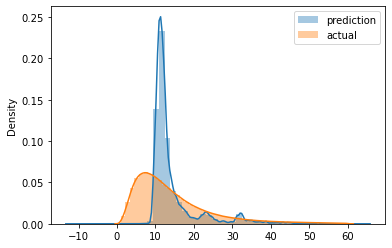

In [33]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

### checking accuracy using RMSE

In [34]:
mean_squared_error(y_train, y_pred, squared=False)

7.6492610279057605

meaning, on average the model is wrong by 7.6 minutes.

### Functionizing the data preprocessing steps.

In [35]:
def prepare_xtrain(dataset):
    """
    This function should take in a dataset and prepare the data to get
    the feature matrix necessary to pass to the regression model to predict.
    """
    df_jan = pd.read_parquet(dataset)
    
    df_jan["duration"] = df_jan["tpep_dropoff_datetime"] - df_jan["tpep_pickup_datetime"]
    # converting duration to seconds
    df_jan['duration'] = df_jan["duration"].apply(lambda td: td.total_seconds()/60)
    
    # selecting only trips between 1 and 60 minutes
    df = df_jan[(df_jan["duration"] >= 1) & (df_jan["duration"] <= 60)]
    
    # getting the categorical variables
    categorical = ["PULocationID", "DOLocationID"]
    
    df[categorical] = df[categorical].astype(str)
    
    return df
    


### Evaluating the model on February data

#### preparing the data for prediction

In [38]:
feb_raw_data = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet"

In [39]:
feb_data_ready = prepare_xtrain(feb_raw_data)

/tmp/ipykernel_11777/3122510270.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = df[categorical].astype(str)


In [40]:
feb_data_ready.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
duration                        float64
dtype: object

### preparing the evaluation feature matrix

In [41]:
eva_data = feb_data_ready[categorical]

In [42]:
eva_data

,PULocationID,DOLocationID
0,142,163
3,132,26
4,161,145
5,148,236
6,137,244
...,...,...
2913950,249,140
2913951,186,79
2913952,158,143
2913953,79,162


In [43]:
# converting the data to dicts

eva_data_dicts = eva_data.to_dict(orient='records')


In [44]:
eva_data_dicts

[{'PULocationID': '142', 'DOLocationID': '163'},
 {'PULocationID': '132', 'DOLocationID': '26'},
 {'PULocationID': '161', 'DOLocationID': '145'},
 {'PULocationID': '148', 'DOLocationID': '236'},
 {'PULocationID': '137', 'DOLocationID': '244'},
 {'PULocationID': '263', 'DOLocationID': '141'},
 {'PULocationID': '48', 'DOLocationID': '243'},
 {'PULocationID': '114', 'DOLocationID': '211'},
 {'PULocationID': '114', 'DOLocationID': '249'},
 {'PULocationID': '125', 'DOLocationID': '107'},
 {'PULocationID': '140', 'DOLocationID': '42'},
 {'PULocationID': '140', 'DOLocationID': '226'},
 {'PULocationID': '249', 'DOLocationID': '90'},
 {'PULocationID': '234', 'DOLocationID': '4'},
 {'PULocationID': '114', 'DOLocationID': '125'},
 {'PULocationID': '132', 'DOLocationID': '239'},
 {'PULocationID': '132', 'DOLocationID': '230'},
 {'PULocationID': '140', 'DOLocationID': '68'},
 {'PULocationID': '144', 'DOLocationID': '79'},
 {'PULocationID': '132', 'DOLocationID': '90'},
 {'PULocationID': '236', 'DOL

In [45]:
# dv = DictVectorizer()

eval_dicts = dv.transform(eva_data_dicts)

### Predicting the feb data

In [46]:
y_pred_feb = lr.predict(eval_dicts)


### measuring accuracy on feb data

In [47]:
actual_duration_feb = feb_data_ready["duration"].values

In [48]:
actual_duration_feb

array([ 1.68333333, 32.08333333, 13.3       , ..., 14.        ,
        7.        ,  9.8       ])

In [49]:
mean_squared_error(actual_duration_feb, y_pred_feb, squared=False)

7.81183265470218

meaning the model is still averagely 8 minutes wrong.

## End of Homework One
* Selorm Komla Darkey